## Logistic Regression

### Predict accident type (0,1) given a set of input variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
import re

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

In [3]:
df = pd.DataFrame(iris.data)

In [4]:
df.columns = [re.sub(' \(cm\)','', feature) for feature in iris.feature_names] 

In [5]:
df = pd.concat([df,pd.DataFrame({'label':iris.target})],axis=1)

In [6]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Class가 2가 아닌 ([0, 1]) row만 추출

In [7]:
df_2class = df[df.label != 2]

Sepal length와 speal width만 분석에 사용

In [8]:
X = df_2class[['sepal length','sepal width']].values  # we only take the first two features.
Y = df_2class['label'].values

In [9]:
logreg = linear_model.LogisticRegression()

In [10]:
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

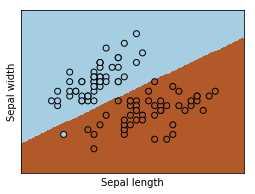

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

C:\Users\sung.DESKTOP-KK5DPBF\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
logit = linear_model.LogisticRegression()
logit.fit(X = X_train, y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
logit.intercept_

array([-0.31157003])

In [15]:
logit.coef_

array([[ 1.97532458, -3.3194525 ]])

In [16]:
pred = logit.predict(X = X_test)
pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0])

## Confusion Matrix - simple

In [17]:
pd.crosstab(pred, y_test)

col_0,0,1
row_0,,
0,15,0
1,1,14


## Prediction Accuracy

In [18]:
print('Prediction Accuracy: ', logit.score(X = X_test, y = y_test))

Prediction Accuracy:  0.9666666666666667


## Confusion Matrix - custom

In [19]:
from sklearn.metrics import confusion_matrix

conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,15,1
True Type 1,0,14


In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        16
          1       0.93      1.00      0.97        14

avg / total       0.97      0.97      0.97        30



## ROC Curve

In [22]:
from sklearn.metrics import roc_curve, auc

In [23]:
fpr, tpr, _ = roc_curve(y_test, logit.predict(X = X_test))

ROC AUC: 0.97


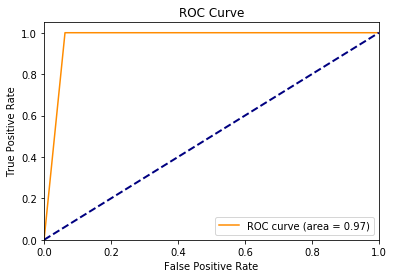

In [24]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 실습: petal length, petal width를 이용하여 logistic regression 학습 후 decision boundary를 그려보자

## 실습: petal length, petal width를 이용하여 logistic regression 학습 후 confusion matrix 출력

## 4가지 feature 모두를 사용하여 logistic regression 학습 후 3-class prediction 수행

In [43]:
X = df[['sepal length','sepal width','petal length','petal width']].values  # we only take the first two features.
Y = df['label'].values

In [44]:
logreg = linear_model.LogisticRegression()
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [46]:
logit.fit(X = X_train, y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
logit.intercept_

array([ 0.26236911,  0.57967803, -0.95287619])

In [48]:
logit.coef_

array([[ 0.42985326,  1.31857597, -2.12342866, -0.94349286],
       [ 0.23265971, -1.33128664,  0.83370869, -1.5109033 ],
       [-1.4722414 , -1.23141891,  1.98428689,  2.33701094]])

In [49]:
pred = logit.predict(X = X_test)
pred

array([2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0,
       2])

In [50]:
pd.crosstab(pred, y_test)

col_0,0,1,2
row_0,,,
0,10,0,0
1,0,14,2
2,0,1,18


In [51]:
print('Prediction Accuracy: ', logit.score(X = X_test, y = y_test))

Prediction Accuracy:  0.9333333333333333


## 실습: Boston weather_clean.csv 데이터를 이용하여 4가지 기상 이벤트 예측

In [52]:
data = pd.read_csv('Boston weather_clean.csv')

In [53]:
data

,Year,Month,Day,High Temp (F),Avg Temp (F),Low Temp (F),High Dew Point (F),Avg Dew Point (F),Low Dew Point (F),High Humidity (%),...,Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,2008,1,1,40,34,28,37,31,22,92,...,29.56,10,8,1,23,10,36,0.18,0.18,Both
1,2008,1,2,33,22,10,28,18,-3,82,...,29.55,10,10,9,28,15,38,0.00,0.00,Snow
2,2008,1,3,14,11,7,-3,-7,-9,60,...,30.22,10,10,10,25,17,32,0.00,0.00,None
3,2008,1,4,32,20,8,13,5,-8,63,...,30.37,10,10,10,23,12,28,0.00,0.00,None
4,2008,1,5,42,35,27,26,16,12,64,...,30.17,10,10,10,16,9,23,0.00,0.00,None
5,2008,1,6,47,42,36,34,30,24,82,...,30.15,10,10,9,15,7,20,0.00,0.00,None
6,2008,1,7,55,45,35,43,38,32,92,...,30.13,10,8,5,18,7,22,0.00,0.00,None
7,2008,1,8,67,56,45,49,45,41,86,...,29.93,10,9,7,18,12,23,0.00,0.00,None
8,2008,1,9,62,54,46,52,41,17,90,...,29.64,10,10,9,29,18,37,0.00,0.00,Rain
9,2008,1,10,49,44,38,31,25,21,70,...,29.92,10,10,10,16,11,22,0.00,0.00,None
